In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [4]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Capstone/Project/Data/C22-PS300.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./data')
zip_ref.close()

In [5]:
base_dir = './data/C22-PS300'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training acne pictures
train_blackhead_dir = os.path.join(train_dir, 'blackhead')
train_folikulitis_dir = os.path.join(train_dir, 'folikulitis')
train_melasma_dir = os.path.join(train_dir, 'melasma')
train_nodules_dir = os.path.join(train_dir, 'nodules')
train_papula_dir = os.path.join(train_dir, 'papula')
train_pustula_dir = os.path.join(train_dir, 'pustula')
train_rosacea_dir = os.path.join(train_dir, 'rosacea')
train_whitehead_dir = os.path.join(train_dir, 'whitehead')
train_normalface_dir = os.path.join(train_dir, 'normalface')

# Directory with our validation acne pictures
validation_blackhead_dir = os.path.join(validation_dir, 'blackhead')
validation_folikulitis_dir = os.path.join(validation_dir, 'folikulitis')
validation_melasma_dir = os.path.join(validation_dir, 'melasma')
validation_nodules_dir = os.path.join(validation_dir, 'nodules')
validation_papula_dir = os.path.join(validation_dir, 'papula')
validation_pustula_dir = os.path.join(validation_dir, 'pustula')
validation_rosacea_dir = os.path.join(validation_dir, 'rosacea')
validation_whitehead_dir = os.path.join(validation_dir, 'whitehead')
validation_normalface_dir = os.path.join(validation_dir, 'normalface')

In [ ]:
train_blackhead_fnames = os.listdir(train_blackhead_dir)
train_folikulitis_fnames = os.listdir(train_folikulitis_dir)
train_melasma_fnames = os.listdir(train_melasma_dir)
train_nodules_fnames = os.listdir(train_nodules_dir)
train_papula_fnames = os.listdir(train_papula_dir)
train_pustula_fnames = os.listdir(train_pustula_dir)
train_rosacea_fnames = os.listdir(train_rosacea_dir)
train_whitehead_fnames = os.listdir(train_whitehead_dir)
train_normalface_fnames = os.listdir(train_normalface_dir)

print(train_blackhead_fnames[:3])

In [7]:
print('total training blackhead images :', len(os.listdir(train_blackhead_dir)))
print('total training folikulitis images :', len(os.listdir(train_folikulitis_dir)))
print('total training melasma images :', len(os.listdir(train_melasma_dir)))
print('total training nodules images :', len(os.listdir(train_nodules_dir)))
print('total training papula images :', len(os.listdir(train_papula_dir)))
print('total training pustula images :', len(os.listdir(train_pustula_dir)))
print('total training rosacea images :', len(os.listdir(train_rosacea_dir)))
print('total training whitehead images :', len(os.listdir(train_whitehead_dir)))
print('total training normalface images :', len(os.listdir(train_normalface_dir)))

print('total validation blackhead images :', len(os.listdir(validation_blackhead_dir)))
print('total validation folikulitis images :', len(os.listdir(validation_folikulitis_dir)))
print('total validation melasma images :', len(os.listdir(validation_melasma_dir)))
print('total validation nodules images :', len(os.listdir(validation_nodules_dir)))
print('total validation papula images :', len(os.listdir(validation_papula_dir)))
print('total validation pustula images :', len(os.listdir(validation_pustula_dir)))
print('total validation rosacea images :', len(os.listdir(validation_rosacea_dir)))
print('total validation whitehead images :', len(os.listdir(validation_whitehead_dir)))
print('total validation normalface images :', len(os.listdir(validation_normalface_dir)))

total training blackhead images : 70
total training folikulitis images : 67
total training melasma images : 51
total training nodules images : 84
total training papula images : 73
total training pustula images : 74
total training rosacea images : 82
total training whitehead images : 58
total training normalface images : 88
total validation blackhead images : 21
total validation folikulitis images : 30
total validation melasma images : 32
total validation nodules images : 30
total validation papula images : 29
total validation pustula images : 29
total validation rosacea images : 34
total validation whitehead images : 20
total validation normalface images : 30


In [8]:
model = keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

In [12]:
model_mod = model.layers[-1].output
x = keras.layers.Flatten()(model_mod)
denser = keras.layers.Dense(128, activation='relu')(x)
DO = keras.layers.Dropout(0.5)(denser)
prediction = keras.layers.Dense(9, activation='softmax')(DO)

In [13]:
fullmodel = keras.Model(inputs=model.input, outputs=prediction)

In [14]:
fullmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [15]:
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001)
fullmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
for layers in model.layers[:]:
  layers.trainable=False

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen  = ImageDataGenerator(
      rescale = 1.0/255.)

# --------------------
# Flow training images in batches of 27 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=27,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 22 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=22,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))


Found 621 images belonging to 9 classes.
Found 242 images belonging to 9 classes.


In [28]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy')>0.75):
      print('Good enough accuracy so cancelling training!')
      self.model.stop_training = True

callback = MyCallback()

In [42]:
history = fullmodel.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=23,
                        epochs=30,
                        validation_steps=11,
                        verbose=2,
                        callbacks=[callback])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


23/23 - 13s - loss: 0.0387 - accuracy: 0.9919 - val_loss: 1.7706 - val_accuracy: 0.7397 - 13s/epoch - 578ms/step
Epoch 2/30
23/23 - 13s - loss: 0.0393 - accuracy: 0.9887 - val_loss: 1.8686 - val_accuracy: 0.7438 - 13s/epoch - 569ms/step
Epoch 3/30
23/23 - 14s - loss: 0.0352 - accuracy: 0.9903 - val_loss: 1.8897 - val_accuracy: 0.7231 - 14s/epoch - 587ms/step
Epoch 4/30
23/23 - 13s - loss: 0.0553 - accuracy: 0.9791 - val_loss: 1.8936 - val_accuracy: 0.7314 - 13s/epoch - 571ms/step
Epoch 5/30
23/23 - 13s - loss: 0.0434 - accuracy: 0.9839 - val_loss: 1.7956 - val_accuracy: 0.7314 - 13s/epoch - 571ms/step
Epoch 6/30
Good enough accuracy so cancelling training!
23/23 - 13s - loss: 0.0893 - accuracy: 0.9871 - val_loss: 1.6756 - val_accuracy: 0.7521 - 13s/epoch - 574ms/step


Text(0.5, 1.0, 'Training and validation loss')

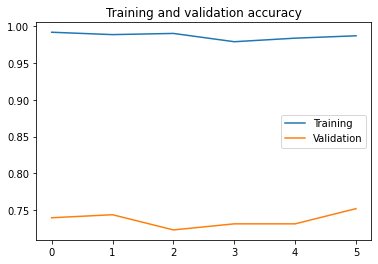

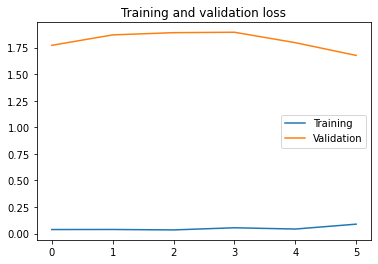

In [43]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

Saving r11.jpg to r11.jpg
percentage:
[[1.57036141e-06 1.25921360e-04 7.25408318e-05 1.15666924e-04
  4.52719132e-06 8.42392910e-04 4.46992723e-04 9.98383522e-01
  6.75510000e-06]]


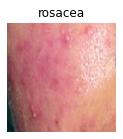

In [47]:
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
class_dict = {v : k for k, v in train_generator.class_indices.items()}
uploads = files.upload()

n_files = len(uploads)
fig = plt.figure(figsize=(2, 2 * n_files))

for i, filename in enumerate(uploads):
  img = image.load_img(
      filename,
      target_size=(224, 224)
  )
  x = image.img_to_array(img)/255
  x = np.expand_dims(x, axis=0)

  predict = fullmodel.predict(x)
  class_prediction = np.argmax(predict)
  prediction = class_dict[class_prediction]
  
  
  ax = fig.add_subplot(n_files, 1, i+1)
  ax.imshow(img)
  ax.set_title(prediction)
  ax.axis(False)
  print('percentage:')
  print(predict)


In [50]:
#h5 model
saved_model_path = "/content/drive/MyDrive/Capstone/Project/Model/Model.h5"

fullmodel.save(saved_model_path)

In [ ]:
!sudo pip install tensorflowjs

In [52]:
#TensorFlow.js model
!tensorflowjs_converter --input_format=keras "/content/drive/MyDrive/Capstone/Project/Model/Model.h5" /content/drive/MyDrive/Capstone/Project/Model